In [181]:
import numpy as np
from scipy.integrate import solve_ivp

# matplotlib imports
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

$\begin{bmatrix} \dot \theta \\ \ddot \theta \end{bmatrix} = \begin{bmatrix} \dot \theta \\ - \dfrac{g \sin \theta}{\ell}\end{bmatrix}$

In [182]:
# assign constants (g, ell) values
g = 9.81
ell = 1.10

# initial conditions: theta=30 deg, velocity=0
theta0 = np.deg2rad(165)
theta_dot0 = 0

# set the simulation time and frames per second
tff = 2*np.pi*np.sqrt(ell/g)
fps = 50

In [183]:
print(tff)

2.103980484748653


In [184]:
maxx_n = int(30/tff)

In [185]:
# clean time
from fractions import Fraction

def find_best_multiplier(x, max_n=15):
    best_n = 1
    min_error = float('inf')

    for n in range(1, max_n + 1, 2):
        candidate = n * x
        error = abs(candidate - round(candidate))
        
        if error < min_error:
            min_error = error
            best_n = n

            # If error is extremely small, we can stop early
            if error < 1e-9:
                break

    return best_n, round(best_n * x)

In [186]:
Nfin, Tfin= find_best_multiplier(tff, maxx_n)


In [187]:
print(Nfin)

9


In [188]:
print(tff*Nfin, Tfin)

18.93582436273788 19


In [189]:
t_final = Tfin

In [190]:
# wrapping angle
def wrap_angle(angle):
    return (angle + 180) % 360 - 180

# our system of differential equations
# y[0] is theta, y[1] is theta_dot
def pendulum_ODE(t, y): 
    return (y[1], -g*np.sin(y[0])/ell)

# solve the ODE, 30 fps
sol = solve_ivp(pendulum_ODE, [0, t_final], (theta0, theta_dot0), 
    t_eval=np.linspace(0,t_final,t_final*fps+1))

# output of the solver
theta, theta_dot = sol.y
t = sol.t

# convert from radians to degrees
theta_deg = wrap_angle(np.rad2deg(sol.y[0]))
theta_dot_deg = np.rad2deg(sol.y[1])

# optional: save theta_deg in a CSV file
# np.savetxt('pend.csv', np.transpose([t, theta_deg, theta_dot_deg]), delimiter=',')

In [191]:
# bonus! Customize color scheme in matplotlib
# change matplotlib defaults
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['legend.labelcolor'] = 'white'
plt.rcParams['xtick.labelcolor'] = 'white'
plt.rcParams['ytick.labelcolor'] = 'white'
plt.rcParams['grid.color'] = '#707070'

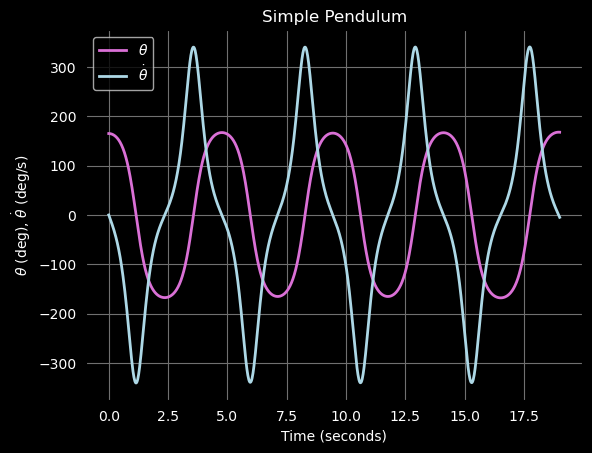

In [192]:
# create a plot of theta and theta_dot vs time
plt.plot(t, theta_deg, 'orchid', lw=2, label=r'$\theta$')
plt.plot(t, theta_dot_deg, 'lightblue', lw=2, label=r'$\dot \theta$')
plt.title('Simple Pendulum')
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel(r'$\theta$ (deg), $\dot \theta$ (deg/s)')
plt.grid()
plt.show()

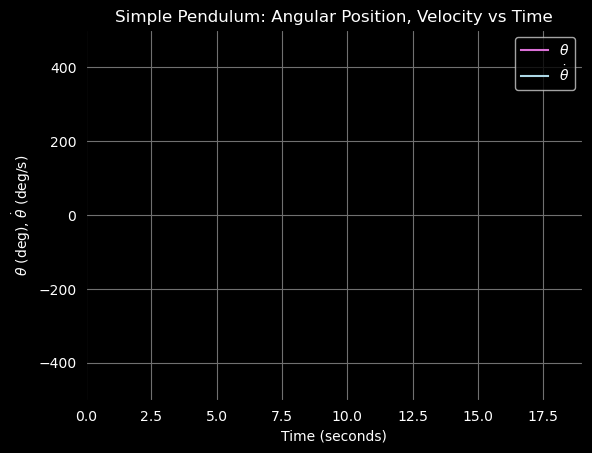

In [193]:
# animate theta, theta_dot vs time
fig, ax = plt.subplots()

theta_curve, = ax.plot(t[0], theta_deg[0], 'orchid')
theta_dot_curve, = ax.plot(t[0], theta_dot_deg[0], 'lightblue')

ax.set_title('Simple Pendulum: Angular Position, Velocity vs Time')
ax.set_xlim(0, t_final)
ax.set_ylim(-500, 500)
ax.set_xlabel('Time (seconds)')
ax.set_ylabel(r'$\theta$ (deg), $\dot \theta$ (deg/s)')
ax.legend([r'$\theta$', r'$\dot \theta$'])
ax.grid()

def animate(i):
    theta_curve.set_data(t[:i+1], theta_deg[:i+1])
    theta_dot_curve.set_data(t[:i+1], theta_dot_deg[:i+1])

# save video @ 30 fps
anim = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=fps)
anim.save('time_domain.mp4', writer=ffmpeg_writer)
# you need to make sure the ffmpeg is installed on your machine and 
# the path is configured correctly. see Troubleshooting for details

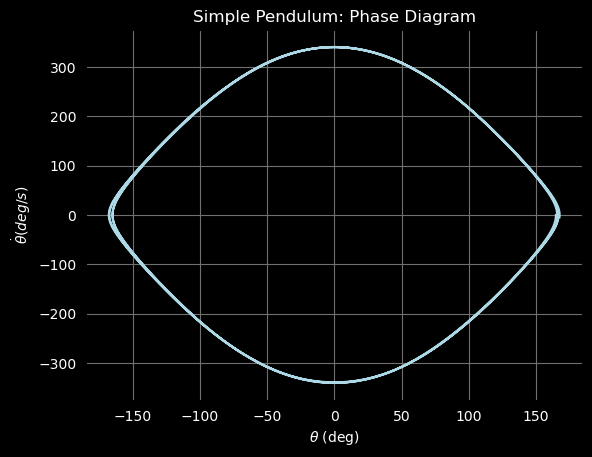

In [194]:
# create a phase diagram of theta, theta_dot
plt.plot(theta_deg, theta_dot_deg, 'lightblue')
plt.title('Simple Pendulum: Phase Diagram')
plt.xlabel(r'$\theta$ (deg)')
plt.ylabel(r'$\dot \theta (deg/s)$')
plt.grid()
plt.show()

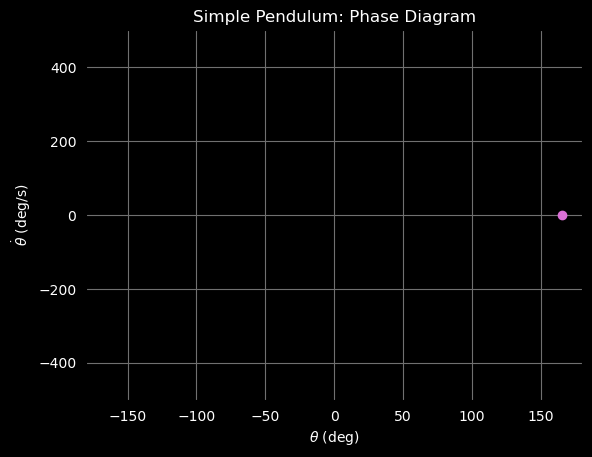

In [195]:
# animate the phase diagram
fig, ax = plt.subplots()

phase_curve, = ax.plot(theta_deg[0], theta_dot_deg[0], c='lightblue')
phase_dot, =  ax.plot(theta_deg[0], theta_dot_deg[0], c='orchid', marker= 'o')

ax.set_title('Simple Pendulum: Phase Diagram')
ax.set_xlim(-180, 180)
ax.set_ylim(-500, 500)
ax.set_xlabel(r'$\theta$ (deg)')
ax.set_ylabel(r'$\dot \theta$ (deg/s)')
ax.grid()

def animate(i):
    phase_curve.set_data(theta_deg[:i+1], theta_dot_deg[:i+1])
    phase_dot.set_data([theta_deg[i]], [theta_dot_deg[i]])

ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=fps)
ani.save('phase_diagram.mp4', writer=ffmpeg_writer)

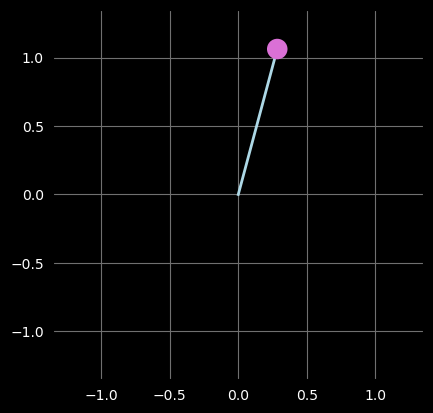

In [196]:
# create an animation of the pendulum swining with Matplotlib
def pend_pos(theta):
    return (ell*np.sin(theta), -ell*np.cos(theta))

# create figure
fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
ax.set_xlim(-(ell + 0.25), (ell + 0.25))
ax.set_ylim(-(ell + 0.25), (ell + 0.25))
ax.set_aspect('equal')
ax.grid()

x0, y0 = pend_pos(theta0)
line, = ax.plot([0, x0], [0, y0], lw=2, c='lightblue')
circle = ax.add_patch(plt.Circle(pend_pos(theta0), 0.075, fc='orchid', zorder=3))

# animate each frame "i"
def animate(i):
    x,y = pend_pos(theta[i])
    line.set_data([0, x], [0, y])
    circle.set_center((x, y))

# save a video: 30 fps
ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=fps)
ani.save('pend.mp4', writer=ffmpeg_writer)

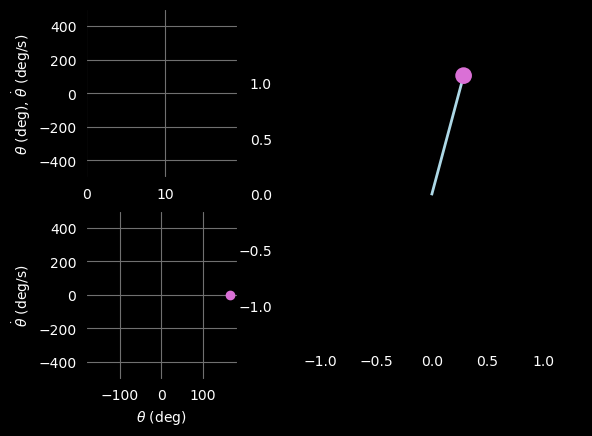

In [197]:
# animate everything together!
fig = plt.figure()
gs = gridspec.GridSpec(2,2, width_ratios=[1,2], height_ratios=[1,1])

# theta, theta_dot vs time
ax0 = fig.add_subplot(gs[0,0])
ax0.set_xlim(0, t_final)
ax0.set_ylim(-500, 500)
# ax0.set_xlabel('Time (s)')
ax0.set_ylabel(r'$\theta$ (deg), $\dot \theta$ (deg/s)')
# ax0.legend([r'$\theta$', r'$\dot \theta$'])
ax0.grid()

theta_curve, = ax0.plot(t[0], theta_deg[0], 'lightblue')
theta_dot_curve, = ax0.plot(t[0], theta_dot_deg[0], 'orchid')

# phase diagram
ax1 = fig.add_subplot(gs[1,0])
ax1.set_xlim(-180, 180)
ax1.set_ylim(-500, 500)
ax1.set_xlabel(r'$\theta$ (deg)')
ax1.set_ylabel(r'$\dot \theta$ (deg/s)')
ax1.grid()

phase_curve, = ax1.plot(theta_deg[0], theta_dot_deg[0], 'lightblue')
phase_dot, =  ax1.plot(theta_deg[0], theta_dot_deg[0], c='orchid', marker = 'o')

# pendulum
def pend_pos(theta):
    return (ell*np.sin(theta), -ell*np.cos(theta))

ax2 = fig.add_subplot(gs[:,1])
ax2.set_xlim(-(ell + 0.25), (ell + 0.25))
ax2.set_ylim(-(ell + 0.25), (ell + 0.25))
ax2.set_aspect('equal')

# draw the pendulum
x0, y0 = pend_pos(theta0)
line, = ax2.plot([0, x0], [0, y0], lw=2, c='lightblue')
circle = ax2.add_patch(plt.Circle(pend_pos(theta0), 0.075, fc='orchid', zorder=3))


def animate(i):
    theta_curve.set_data(t[:i+1], theta_deg[:i+1])
    theta_dot_curve.set_data(t[:i+1], theta_dot_deg[:i+1])

    phase_curve.set_data(theta_deg[:i+1], theta_dot_deg[:i+1])
    phase_dot.set_data(([theta_deg[i]], [theta_dot_deg[i]]))

    x, y = pend_pos(theta[i])
    line.set_data([0, x], [0, y])
    circle.set_center((x, y))

# save a video: 30 fps
ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=fps)
ani.save('all.mp4', writer=ffmpeg_writer)